In [1]:
import sys
import struct
import ctypes
import numpy as np
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ctypes
%matplotlib notebook

class pointStruct(ctypes.Structure):
    _fields_ = [('lineCount', ctypes.c_int),
                ('allDataPointsCount', ctypes.c_int),
                ('pointCounts', ctypes.POINTER(ctypes.c_int)),
                ('xValues', ctypes.POINTER(ctypes.c_double)),
                ('yValues', ctypes.POINTER(ctypes.c_double)),
                ('zValues', ctypes.POINTER(ctypes.c_double))]
  
#mydll = ctypes.cdll.LoadLibrary(r"D:\0nastia\github\RelativicHeavyBall\dlls\LRGalaxies.dll")
mydll = ctypes.cdll.LoadLibrary(r"D:\0nastia\github\RelativicHeavyBall\x64\Debug\testPythonDLL.dll")

f = mydll.logisticRegressionTarget
mydll.logisticRegressionTarget.restype = ctypes.c_double
mydll.logisticRegressionTarget.argtypes = [ctypes.c_double, ctypes.c_double]

testFunc = mydll.logisticRegressionGalaxiesMulty
mydll.logisticRegressionGalaxiesMulty.restype = ctypes.POINTER(pointStruct)
mydll.logisticRegressionGalaxiesMulty.argtypes = [ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_int, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double , ctypes.c_double] 

ret = testFunc(3, 3, 0, 0, 1000, 0.0001, 0.1, 0.1, 100, 2)

array_pointer = ctypes.cast(ret.contents.pointCounts, ctypes.POINTER(ctypes.c_int * ret.contents.lineCount))
pointCounts = np.frombuffer(array_pointer.contents, dtype = ctypes.c_int)

array_pointer = ctypes.cast(ret.contents.xValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
xValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.yValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
yValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.zValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
zValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

print("lineCount: ", ret.contents.lineCount)
print("allDataPointsCount: ", ret.contents.allDataPointsCount)
print("pointCounts: ", pointCounts)
print("xValues: ", xValues)
print("yValues: ", yValues)
print("zValues: ", zValues)

class logisticRegressionData(ctypes.Structure):
    _fields_ = [('negativePointCount', ctypes.c_int),
                ('negativePointXValues', ctypes.POINTER(ctypes.c_double)),
                ('negativePointYValues', ctypes.POINTER(ctypes.c_double)),
                
                ('positivePointCount', ctypes.c_int),
                ('positivePointXValues', ctypes.POINTER(ctypes.c_double)),
                ('positivePointYValues', ctypes.POINTER(ctypes.c_double)),
                
                ('lineCount', ctypes.c_int),
                ('lineAParameters', ctypes.POINTER(ctypes.c_double)),
                ('lineBParameters', ctypes.POINTER(ctypes.c_double)),
                ('lineCParameters', ctypes.POINTER(ctypes.c_double))]
    
getLogisticRegressionData = mydll.getLogisticRegressionData
mydll.getLogisticRegressionData.restype = ctypes.POINTER(logisticRegressionData)
mydll.getLogisticRegressionData.argtypes = []

data = getLogisticRegressionData()

array_pointer = ctypes.cast(data.contents.negativePointXValues, ctypes.POINTER(ctypes.c_double * data.contents.negativePointCount))
negativePointXValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.negativePointYValues, ctypes.POINTER(ctypes.c_double * data.contents.negativePointCount))
negativePointYValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(data.contents.positivePointXValues, ctypes.POINTER(ctypes.c_double * data.contents.positivePointCount))
positivePointXValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.positivePointYValues, ctypes.POINTER(ctypes.c_double * data.contents.positivePointCount))
positivePointYValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(data.contents.lineAParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineAParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.lineBParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineBParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.lineCParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineCParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

print("negativePointXValues: ", negativePointXValues)
print("negativePointYValues: ", negativePointYValues)
print("positivePointXValues: ", positivePointXValues)
print("positivePointYValues: ", positivePointYValues)
print("lineAParameters: ", lineAParameters)
print("lineBParameters: ", lineBParameters)
print("lineCParameters: ", lineCParameters)

lineCount:  4
allDataPointsCount:  4012
pointCounts:  [1003 1003 1003 1003]
xValues:  [ 0.         -0.02776649 -0.03344584 ... -0.02696193 -0.0269889
 -0.02701586]
yValues:  [3.         3.38802008 4.18436393 ... 3.20361249 3.2038161  3.20401971]
zValues:  [3119.931      1065.18084002  412.21812324 ... 1176.26094928 1174.31730546
 1172.37366169]
negativePointXValues:  [0.041 1.334 4.169 1.478 1.962 0.705 3.281 3.961 2.995 4.827 2.391 3.902
 0.292 2.421 4.718 5.447 2.771 1.869 0.667 2.035 3.703 1.322 5.673 3.141
 3.253]
negativePointYValues:  [-56.533 -48.5   -59.276 -45.642 -50.536 -46.855 -58.173 -74.509 -63.058
 -69.564 -60.396 -74.847 -62.618 -56.284 -55.105 -53.274 -63.462 -55.088
 -48.701 -65.106 -51.189 -44.667 -70.336 -67.289 -68.132]
positivePointXValues:  [5.547 7.662 5.037 8.723 7.529 7.316 7.19  4.288 9.04  9.264 7.446 7.89
 9.37  5.006 4.393 9.629 9.084 8.756 8.966 8.931]
positivePointYValues:  [-47.356 -42.243 -62.141 -65.259 -74.222 -71.965 -73.158 -44.894 -66.058
 -52.352

<IPython.core.display.Javascript object>


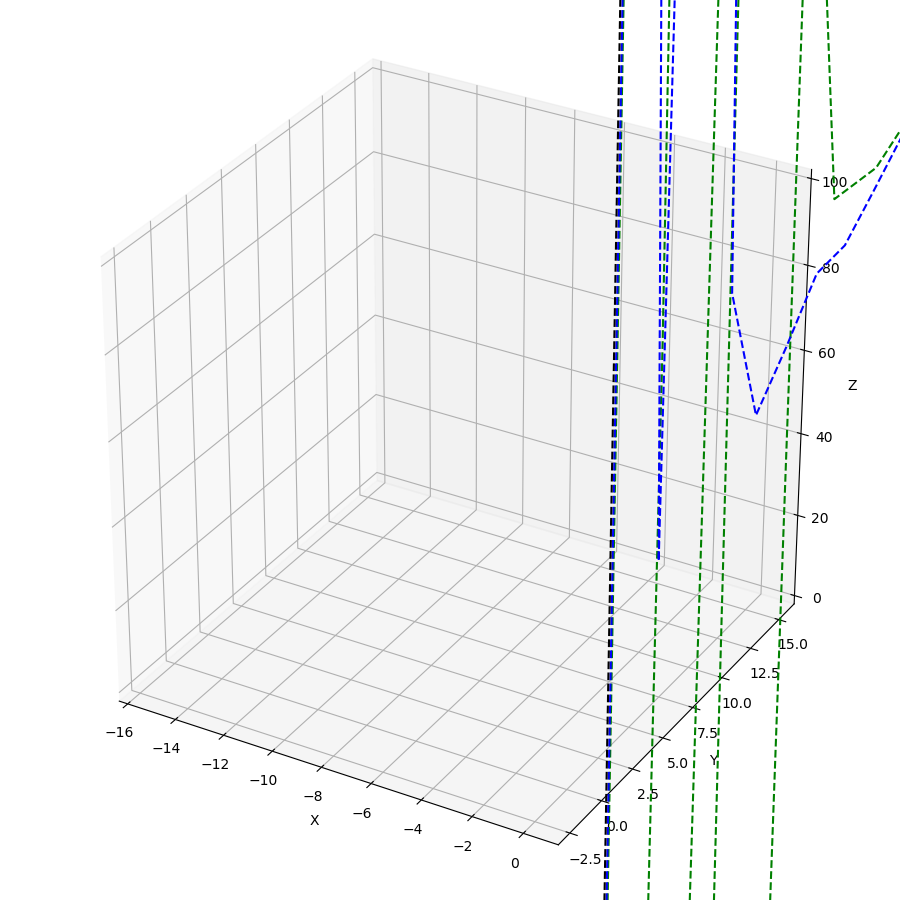

In [2]:
fig = plt.figure(figsize = (9, 9)) 
axe = p3.Axes3D(fig)

def gen1(n):
    for i in range(n):
        yield np.array([xValues[i], yValues[i], zValues[i]])
        
def gen2(n):
    for i in range(n):
        yield np.array([xValues[pointCounts[0] + i], yValues[pointCounts[0] + i], zValues[pointCounts[0] + i]])
        
def gen3(n):
    for i in range(n):
        yield np.array([xValues[pointCounts[0] + pointCounts[1] + i], yValues[pointCounts[0] + pointCounts[1] + i], zValues[pointCounts[0] + pointCounts[1] + i]])

def gen4(n):
    for i in range(n):
        yield np.array([xValues[pointCounts[0] + pointCounts[1] + pointCounts[2] + i], yValues[pointCounts[0] + pointCounts[1] + pointCounts[2] + i], zValues[pointCounts[0] + pointCounts[1] + pointCounts[2] + i]])
        
def animate(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

n1 = pointCounts[0]
data1 = np.array(list(gen1(n1))).T
line1, = axe.plot(data1[0, 0:1], data1[1, 0:1], data1[2, 0:1], 'g--')

n2 = pointCounts[1]
data2 = np.array(list(gen2(n2))).T
line2, = axe.plot(data2[0, 0:1], data2[1, 0:1], data2[2, 0:1], 'r--')

n3 = pointCounts[2]
data3 = np.array(list(gen3(n3))).T
line3, = axe.plot(data3[0, 0:1], data3[1, 0:1], data3[2, 0:1], 'b--')

n4 = pointCounts[3]
data4 = np.array(list(gen4(n4))).T
line4, = axe.plot(data4[0, 0:1], data4[1, 0:1], data4[2, 0:1], 'k--')

nx = 100
ny = 100
ax = -16.
bx = 1.0
ay = -3.0
by = 16.0

axe.set_xlim3d([ax, bx])
axe.set_xlabel('X')

axe.set_ylim3d([ay, by])
axe.set_ylabel('Y')

axe.set_zlim3d([0.0, 100])
axe.set_zlabel('Z')

colors = ['g', 'r', 'b', 'k']
s = 0
for x in range(ret.contents.lineCount):
    s += pointCounts[x]
    axe.scatter3D(xValues[s - 1], yValues[s - 1], zValues[s - 1], color = colors[x])

ani1 = animation.FuncAnimation(fig, animate, n1, fargs=(data1, line1), interval=1, blit=False, repeat=False)
ani2 = animation.FuncAnimation(fig, animate, n2, fargs=(data2, line2), interval=1, blit=False, repeat=False)
ani3 = animation.FuncAnimation(fig, animate, n3, fargs=(data3, line3), interval=1, blit=False, repeat=False)
ani4 = animation.FuncAnimation(fig, animate, n4, fargs=(data4, line4), interval=1, blit=False, repeat=False)

plt.show();

<IPython.core.display.Javascript object>


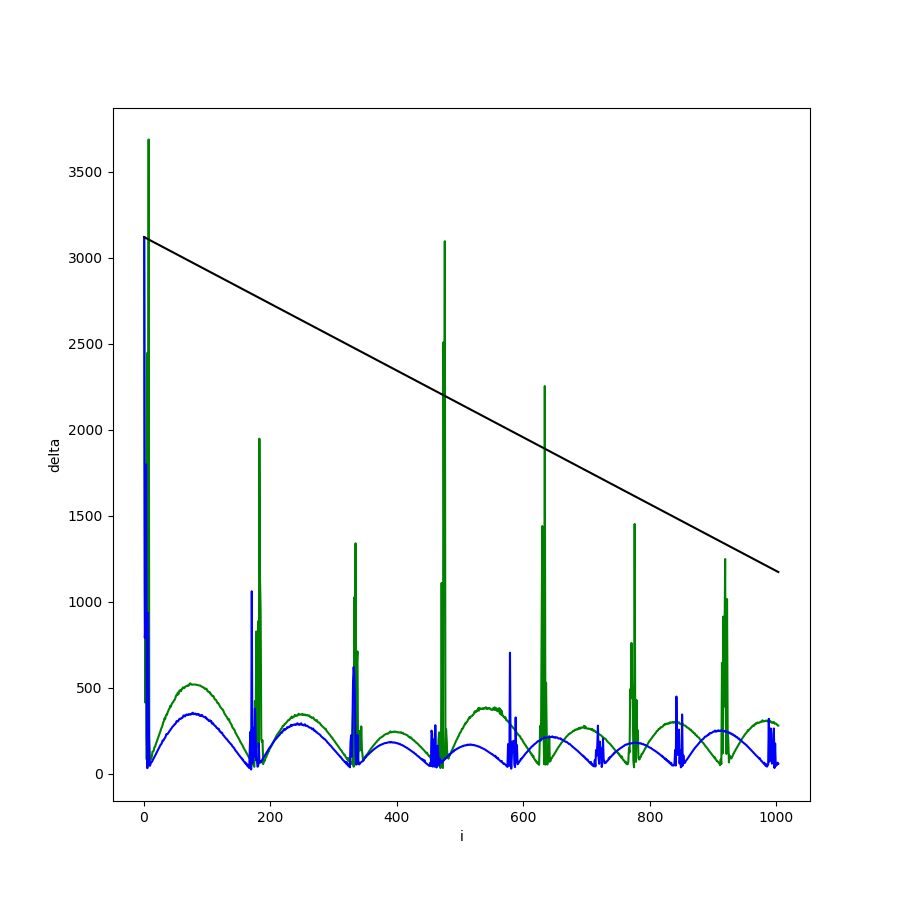

In [3]:
fig = plt.figure(figsize = (9, 9)) 

count = pointCounts[0]
iterations = [i+1 for i in range(count)]

a = 0

for x in range(ret.contents.lineCount):     
    sh=0
    sz=count - sh
    plt.plot(iterations[sh:sh + sz], zValues[a + sh:a+sh + sz], color = colors[x])
    a += pointCounts[x]

plt.ylabel('delta')
plt.xlabel('i')
plt.show()

<IPython.core.display.Javascript object>


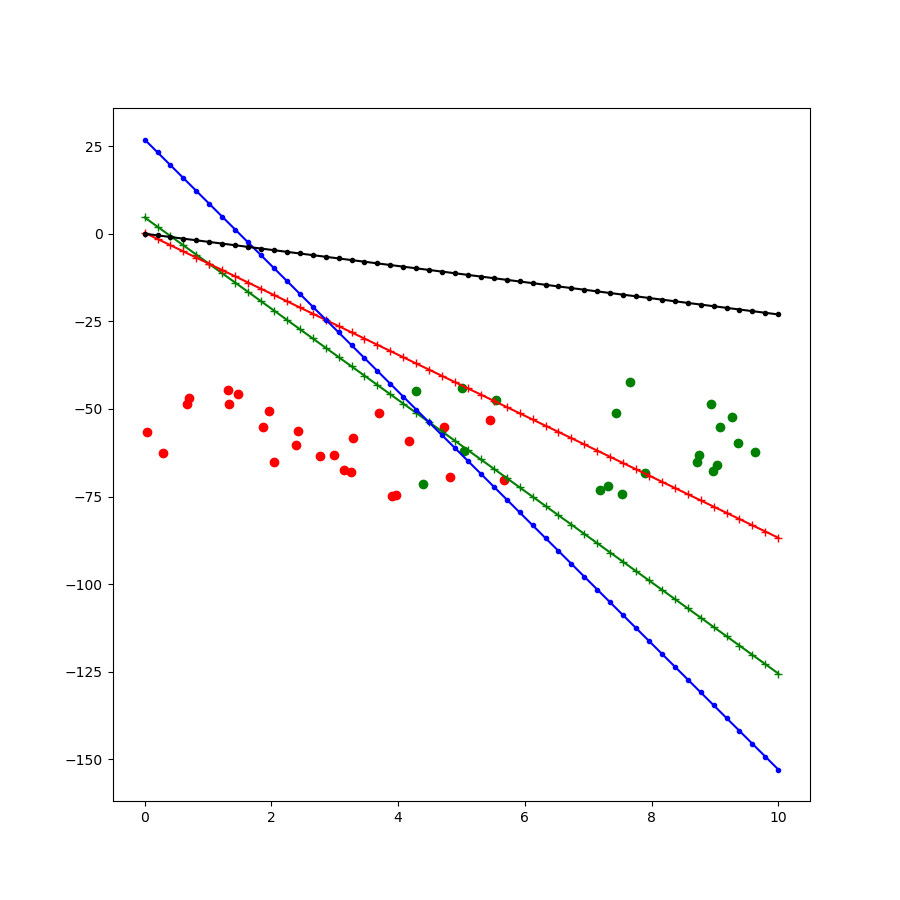

[4.623019900155209, 1.967721501909511, -0.6875768963361875, -3.3428752945818867, -5.998173692827583, -8.653472091073285, -11.308770489318983, -13.96406888756468, -16.619367285810377, -19.274665684056078, -21.92996408230178, -24.585262480547478, -27.240560878793175, -29.89585927703887, -32.55115767528457, -35.206456073530276, -37.86175447177597, -40.517052870021665, -43.17235126826736, -45.82764966651307, -48.482948064758766, -51.13824646300446, -53.79354486125016, -56.44884325949586, -59.104141657741565, -61.75944005598725, -64.41473845423295, -67.07003685247865, -69.72533525072436, -72.38063364897005, -75.03593204721577, -77.69123044546144, -80.34652884370713, -83.00182724195285, -85.65712564019853, -88.31242403844425, -90.96772243668994, -93.62302083493564, -96.27831923318135, -98.93361763142704, -101.58891602967275, -104.24421442791844, -106.89951282616413, -109.55481122440983, -112.21010962265554, -114.86540802090124, -117.52070641914693, -120.17600481739262, -122.83130321563833, -

In [4]:
fig = plt.figure(figsize = (9, 9)) 

n=50

x = np.linspace(0., 10., n)

def f1(i):
    return (-lineAParameters[0]*x[i]+lineCParameters[0])/lineBParameters[0]
def f2(i):
    return (-lineAParameters[1]*x[i]+lineCParameters[1])/lineBParameters[1]
def f3(i):
    return (-lineAParameters[2]*x[i]+lineCParameters[2])/lineBParameters[2]
def f4(i):
    return (-lineAParameters[3]*x[i]+lineCParameters[3])/lineBParameters[3]

y1 = [f1(i) for i in range(n)]
y2 = [f2(i) for i in range(n)]
y3 = [f3(i) for i in range(n)]
y4 = [f4(i) for i in range(n)]

print(y1)

plt.plot(x, y1, color='g', marker='+')
plt.plot(x, y2, color='r', marker='+')
plt.plot(x, y3, color='b', marker='.')
plt.plot(x, y4, color='k', marker='.')

for j in range(data.contents.negativePointCount):
    plt.scatter(negativePointXValues[j], negativePointYValues[j], color = 'r')
    
for j in range(data.contents.positivePointCount):
    plt.scatter(positivePointXValues[j], positivePointYValues[j], color = 'g')